In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
os.chdir('/home2/s439906/project/CASP16/monomer/')
measure = "GDT_TS"
measure = "GDT_HA"
# model = "first"
model = "best"
# mode = "easy"
# mode = "medium"
# mode = "hard"
mode = "all"
impute_value = -2
sys.path.append('/home2/s439906/project/CASP16/monomer/')
os.chdir('/home2/s439906/project/CASP16/monomer/')

heatmap_dir = "./score_T1/"
heatmap_file = f"{measure}-{model}-{mode}-raw.csv"
heatmap_data = pd.read_csv(heatmap_dir + heatmap_file, index_col=0)
heatmap_data
raw_file = f"{measure}-{model}-{mode}-raw.csv"
score_path = "./score_T1/"
raw_data = pd.read_csv(score_path + raw_file, index_col=0)
mask = raw_data.isna()

/home2/s439906/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


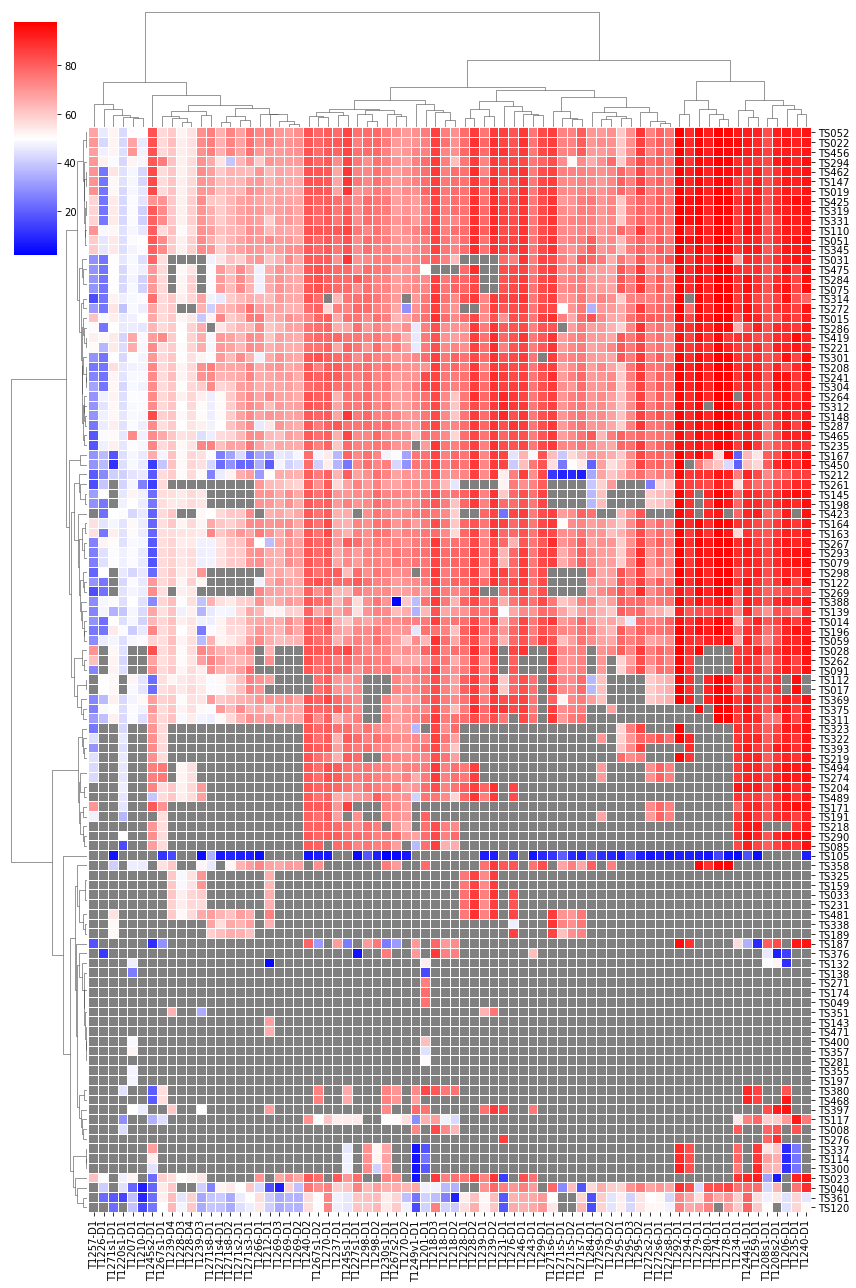

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# Step 1: Calculate row sums
sum = heatmap_data.sum(axis=1)

# Step 2: Sort indices based on row sums
sorted_indices = sum.sort_values(ascending=False).index

# Step 3: Sort the heatmap data and row sums, reset index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)

# Step 4: Sort mask based on sorted indices
sorted_mask = pd.DataFrame(mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)

# Step 5: Mask the sorted heatmap data
masked_data = sorted_heatmap_data.where(~sorted_mask)

# Step 6: Fill NaN values in masked_data with 50 for distance calculation
filled_data = masked_data.fillna(50)

# Step 7: Create custom colormap
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_bad(color='gray')  # Set the masked area to gray

# Step 8: Create a diverging norm to set midpoint at 50
norm = TwoSlopeNorm(vmin=filled_data.min().min(), vmax=filled_data.max().max(), vcenter=50)

# Step 9: Plot heatmap using clustermap
sns.clustermap(
    figsize=(12, 18),
    data=filled_data,
    dendrogram_ratio=(0.1, 0.1),  # Reduce the space taken by dendrograms
    cmap=cmap,                  # Use the custom blue-white-red colormap
    norm=norm,                  # Use diverging norm to center at 50
    linewidths=0.01,             # Set the linewidth between cells
    linecolor='white',          # Set the line color
    # cbar_kws={'label': 'Intensity'},  # Add label to the color bar
    xticklabels=filled_data.columns,  # Use original column names as labels
    yticklabels=sorted_indices,       # Use sorted indices as row labels
    mask=sorted_mask,            # Apply mask to the heatmap
        square=True, 
        method="ward"
)

# Show heatmap
plt.show()


In [5]:
column_annotations={'T1201': 'human',
 'H1202': 'human',
 'H1204': 'nanobody',
 'T1207': 'viral protein',
 'M1209': 'antibody-antigen',
 'T1210': 'normal',
 'M1211': 'viral protein',
 'T1214': 'bacteria',
 'M1212': 'human transposon',
 'T1212': 'human transposon',
 'M1216': 'bacteria',
 'T1219': 'human immunity peptide',
 'T1206': 'viral protein',
 'H1208': 'bacteria',
 'M1221': 'bacteria',
 'T1208s1': 'bacteria',
 'T1208s2': 'bacteria',
 'H1215': 'nanobody',
 'M1224': 'bacteria',
 'T1226': 'viral protein',
 'H1213': 'viral protein',
 'T1249v1': 'viral protein',
 'T1249v2': 'viral protein',
 'M1228v1': 'bacteria',
 'M1228v2': 'bacteria',
 'T1228v1': 'bacteria',
 'T1228v2': 'bacteria',
 'H1217': 'viral protein',
 'T1231': 'viral protein',
 'T1218': 'bacteria',
 'H1220': 'viral protein',
 'T1220s1': 'viral protein',
 'H1222': 'antibody-antigen',
 'H1223': 'antibody-antigen',
 'M1239v1': 'bacteria',
 'M1239v2': 'bacteria',
 'T1239v1': 'bacteria',
 'T1239v2': 'bacteria',
 'H1225': 'antibody-antigen',
 'H1227': 'bacteria',
 'T1227s1': 'bacteria',
 'T1243': 'bacteria',
 'H1229': 'viral protein',
 'H1230': 'viral protein',
 'T1229s1': 'viral protein',
 'T1230s1': 'viral protein',
 'H1232': 'antibody-antigen',
 'H1233': 'antibody-antigen',
 'H1236': 'viral protein',
 'T1234': 'viral protein',
 'T1235': 'viral protein',
 'T1266': 'human protein',
 'T1237': 'bacteria',
 'T1240': 'bacteria',
 'T1269': 'human protein',
 'H1244': 'protozoan parasites',
 'T1244s1': 'protozoan parasites',
 'T1244s2': 'protozoan parasites',
 'H1245': 'fast evolving',
 'T1245s1': 'fast evolving',
 'T1245s2': 'fast evolving',
 'T1246': 'bacteria',
 'H1258': 'human',
 'T1257': 'viral protein',
 'M1271': 'protozoan parasite',
 'T1259': 'bacteria',
 'T1271s1': 'protozoan parasite',
 'T1271s2': 'protozoan parasite',
 'T1271s3': 'protozoan parasite',
 'T1271s4': 'protozoan parasite',
 'T1271s5': 'protozoan parasite',
 'T1271s6': 'protozoan parasite',
 'T1271s7': 'protozoan parasite',
 'T1271s8': 'protozoan parasite',
 'H1265': 'immunity',
 'T1274': 'bacteria',
 'H1267': 'bacteria',
 'T1267s1': 'bacteria',
 'T1267s2': 'bacteria',
 'M1268': 'bacteria',
 'T1270': 'bacteria',
 'T1278': 'bacteria',
 'T1279': 'bacteria',
 'M1282': 'viral protein',
 'T1280': 'viral protein',
 'T1284': 'viral protein',
 'H1272': 'mammal protien',
 'T1272s2': 'mammal protien',
 'T1272s3': 'mammal protien',
 'T1272s4': 'mammal protien',
 'T1272s5': 'mammal protien',
 'T1272s6': 'mammal protien',
 'T1272s7': 'mammal protien',
 'T1272s8': 'mammal protien',
 'T1272s9': 'mammal protien',
 'M1276': 'ants protein',
 'T1276': 'ants protein',
 'M1293': 'viral protein',
 'T1292': 'bacteria',
 'T1294v1': 'moulds',
 'T1294v2': 'moulds',
 'M1287': 'bacteria',
 'T1200': 'bacteria',
 'T1295': 'nanobody',
 'T1300': 'bacteria',
 'M1296': 'antibody',
 'M1297': 'human',
 'T1269v1': 'human',
 'T1298': 'bacteria',
 'T1219v1': 'human',
 'T1219v2': 'human',
 'T1299': 'Archaea'}


for i in filled_data.columns:
    print(f'"{i}":')

column_information_1 = {
"T1201": 'human protein',
"T1206-D1": 'viral protein',
"T1207-D1": 'viral protein',
"T1208s1-D1": 'bacteria protein',
"T1208s2-D1": 'bacteria protein',
"T1210": 'normal protein',
"T1212-D1": 'human protein',
"T1218-D1":  'bacteria protein',
"T1218-D2": 'bacteria protein',
"T1218-D3":'bacteria protein',
"T1220s1": 'viral protein',
"T1226-D1": 'viral protein',
"T1227s1-D1": 'bacteria protein',
"T1228-D1-all":'bacteria protein',
"T1228-D2-all":'bacteria protein',
"T1228-D3-all":'bacteria protein',
"T1228-D4-all":'bacteria protein',
"T1230s1-D1": 'viral protein',
"T1231-D1": 'viral protein',
"T1234-D1": 'viral protein',
"T1235-D1": 'viral protein',
"T1237-D1": 'bacteria protein',
"T1239-D1-all":'bacteria protein',
"T1239-D2-all":'bacteria protein',
"T1239-D3-all":'bacteria protein',
"T1239-D4-all":'bacteria protein',
"T1240-D1":'bacteria protein',
"T1240-D2":'bacteria protein',
"T1243-D1":'bacteria protein',
"T1244s1-D1":'protozoan parasites',
"T1245s1-D1":'fast evolving',
"T1245s2-D1":'fast evolving',
"T1246-D1":'bacteria protein',
"T1249v1-D1":'viral protein',
"T1257":'viral protein',
"T1259-D1":'bacteria protein',
"T1266-D1":'human protein',
"T1267s1-D1":'bacteria protein',
"T1267s1-D2":'bacteria protein',
"T1267s2-D1":'bacteria protein',
"T1269-D1":'human protein',
"T1269-D2":'human protein',
"T1269-D3":'human protein',
"T1270-D1":'bacteria protein',
"T1270-D2":'bacteria protein',
"T1271s1-D1":'protozoan parasite',
"T1271s2-D1":'protozoan parasite',
"T1271s3-D1":'protozoan parasite',
"T1271s4-D1":'protozoan parasite',
"T1271s5-D1":'protozoan parasite',
"T1271s5-D2":'protozoan parasite',
"T1271s6-D1":'protozoan parasite',
"T1271s7-D1":'protozoan parasite',
"T1271s8-D1":'protozoan parasite',
"T1271s8-D2":'protozoan parasite',
"T1272s2-D1":'mammal protein',
"T1272s6-D1":'mammal protein',
"T1272s8-D1":'mammal protein',
"T1272s9-D1":'mammal protein',
"T1274-D1":'bacteria protein',
"T1276-D1":'ants protein',
"T1278-D1":'bacteria protein',
"T1279-D1":'bacteria protein',
"T1279-D2":'bacteria protein',
"T1280-D1":'viral protein',
"T1284-D1":'viral protein',
"T1292-D1":'bacteria protein',
"T1294-D1-all":'mold protein',
"T1295-D1":'nanobody',
"T1295-D2":'nanobody',
"T1295-D3":'nanobody',
"T1298-D1":'bacteria protein',
"T1298-D2":'bacteria protein',
"T1299-D1":'Archaea protein',
}

len(column_information_1)

column_colors_1 = ["#4682B4", "#32CD32", "#FF4500", "#DA70D6", "#8A2BE2", "#FF6347", "#FF69B4", "#40E0D0", "#FFD700", "#ADFF2F",      "#FF7F50",  # 珊瑚色 (Coral)
    "#6495ED",  # 矢车菊蓝 (Cornflower Blue)
    "#DC143C",  # 猩红 (Crimson)
    "#00CED1",  # 深青色 (Dark Turquoise)
    "#FF1493",  # 深粉红 (Deep Pink)
    "#00FA9A",  # 中春绿色 (Medium Spring Green)
    "#BA55D3",  # 洋兰 (Medium Orchid)
    "#FFA500",  # 橙色 (Orange)
    "#7B68EE",  # 中暗蓝色 (Medium Slate Blue)
    "#20B2AA"   # 浅海蓝 (Light Sea Green)
    ]
    
col_info_to_color = {}
column_colors_list_1 = []
for key, value in column_information_1.items():
    if value not in col_info_to_color:
        col_info_to_color[value] = column_colors_1.pop()
    column_colors_list_1.append(col_info_to_color[value])

col_info_to_color
column_colors_list_1


"T1201-D1":
"T1206-D1":
"T1207-D1":
"T1208s1-D1":
"T1208s2-D1":
"T1210-D1":
"T1212-D1":
"T1218-D1":
"T1218-D2":
"T1218-D3":
"T1220s1-D1":
"T1226-D1":
"T1227s1-D1":
"T1228-D1":
"T1228-D2":
"T1228-D3":
"T1228-D4":
"T1230s1-D1":
"T1231-D1":
"T1234-D1":
"T1235-D1":
"T1237-D1":
"T1239-D1":
"T1239-D2":
"T1239-D3":
"T1239-D4":
"T1240-D1":
"T1240-D2":
"T1243-D1":
"T1244s1-D1":
"T1245s1-D1":
"T1245s2-D1":
"T1246-D1":
"T1249v1-D1":
"T1257-D1":
"T1259-D1":
"T1266-D1":
"T1267s1-D1":
"T1267s1-D2":
"T1267s2-D1":
"T1269-D1":
"T1269-D2":
"T1269-D3":
"T1270-D1":
"T1270-D2":
"T1271s1-D1":
"T1271s2-D1":
"T1271s3-D1":
"T1271s4-D1":
"T1271s5-D1":
"T1271s5-D2":
"T1271s6-D1":
"T1271s7-D1":
"T1271s8-D1":
"T1271s8-D2":
"T1272s2-D1":
"T1272s6-D1":
"T1272s8-D1":
"T1272s9-D1":
"T1274-D1":
"T1276-D1":
"T1278-D1":
"T1279-D1":
"T1279-D2":
"T1280-D1":
"T1284-D1":
"T1292-D1":
"T1294-D1":
"T1295-D1":
"T1295-D2":
"T1295-D3":
"T1298-D1":
"T1298-D2":
"T1299-D1":


['#20B2AA',
 '#7B68EE',
 '#7B68EE',
 '#FFA500',
 '#FFA500',
 '#BA55D3',
 '#20B2AA',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#7B68EE',
 '#7B68EE',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#7B68EE',
 '#7B68EE',
 '#7B68EE',
 '#7B68EE',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#00FA9A',
 '#FF1493',
 '#FF1493',
 '#FFA500',
 '#7B68EE',
 '#7B68EE',
 '#FFA500',
 '#20B2AA',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#20B2AA',
 '#20B2AA',
 '#20B2AA',
 '#FFA500',
 '#FFA500',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#00CED1',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#FFA500',
 '#6495ED',
 '#FFA500',
 '#FFA500',
 '#FFA500',
 '#7B68EE',
 '#7B68EE',
 '#FFA500',
 '#FF7F50',
 '#ADFF2F',
 '#ADFF2F',
 '#ADFF2F',
 '#FFA500',
 '#FFA500',
 '#FFD700']

In [6]:
AF2_dict={'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'N',
 'TS008': 'N/A',
 'TS014': 'Y',
 'TS015': 'Y',
 'TS016': 'N/A',
 'TS017': 'N',
 'TS018': 'N/A',
 'TS019': 'Y',
 'TS020': 'N/A',
 'TS022': 'Y',
 'TS023': 'N',
 'TS026': 'N/A',
 'TS027': 'Y',
 'TS028': 'Y',
 'TS029': 'N/A',
 'TS030': 'Y',
 'TS031': 'Y',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'N',
 'TS040': 'Y',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'N',
 'TS051': 'Y',
 'TS052': 'Y',
 'TS055': 'N',
 'TS059': 'Y',
 'TS063': 'N',
 'TS074': 'Y',
 'TS075': 'Y',
 'TS077': 'N',
 'TS079': 'Y',
 'TS080': 'N',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'Y',
 'TS091': 'Y',
 'TS092': 'N/A',
 'TS094': 'N',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'N',
 'TS110': 'Y',
 'TS112': 'N',
 'TS114': 'Y',
 'TS117': 'Y',
 'TS120': 'N/A',
 'TS121': 'N',
 'TS122': 'N',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'Y',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'Y',
 'TS143': 'N/A',
 'TS145': 'Y',
 'TS147': 'Y',
 'TS148': 'Y',
 'TS156': 'N',
 'TS159': 'N/A',
 'TS163': 'Y',
 'TS164': 'Y',
 'TS165': 'N/A',
 'TS167': 'N',
 'TS169': 'N',
 'TS171': 'N',
 'TS172': 'N',
 'TS174': 'N/A',
 'TS177': 'Y',
 'TS183': 'N',
 'TS187': 'Y',
 'TS188': 'N',
 'TS189': 'N',
 'TS191': 'Y',
 'TS196': 'N',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'N',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'Y',
 'TS208': 'N',
 'TS209': 'N/A',
 'TS212': 'Y',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'Y',
 'TS221': 'Y',
    'TS225': 'N/A',
 'TS226': 'N',
 'TS227': 'Y',
 'TS231': 'N/A',
 'TS235': 'Y',
 'TS237': 'N',
 'TS238': 'N',
 'TS241': 'Y',
 'TS261': 'Y',
 'TS262': 'N/A',
 'TS264': 'Y',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'N',
 'TS273': 'N',
 'TS274': 'Y',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'Y',
 'TS286': 'Y',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'Y',
 'TS295': 'N',
 'TS298': 'N/A',
 'TS300': 'Y',
 'TS301': 'Y',
 'TS304': 'N',
 'TS306': 'N',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'N',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Y',
 'TS317': 'N/A',
 'TS319': 'Y',
 'TS322': 'Y',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'Y',
 'TS337': 'Y',
 'TS338': 'N',
 'TS345': 'Y',
 'TS349': 'N',
 'TS351': 'N/A',
 'TS353': 'N',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'Y',
 'TS361': 'N/A',
 'TS363': 'N',
 'TS367': 'N/A',
 'TS369': 'Y',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'Y',
 'TS391': 'N',
 'TS393': 'Y',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'Y',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'N',
 'TS418': 'N/A',
 'TS419': 'Y',
 'TS420': 'N',
 'TS423': 'N/A',
 'TS425': 'Y',
 'TS432': 'N',
 'TS435': 'N',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'Y',
 'TS443': 'N',
 'TS446': 'N',
 'TS447': 'N/A',
 'TS448': 'N',
 'TS450': 'N',
 'TS456': 'Y',
 'TS461': 'N/A',
 'TS462': 'Y',
 'TS464': 'Y',
 'TS465': 'N/A',
 'TS466': 'N',
 'TS468': 'N/A',
 'TS469': 'N',
 'TS471': 'N',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'N',
 'TS481': 'N',
 'TS485': 'N',
 'TS489': 'Y',
 'TS494': 'Y',
 'TS496': 'Y'}
AF2_color = {'Y': 'red', 'N': 'blue', 'N/A': 'gray'}
avail_rows = [ k_v[0]for k_v in AF2_dict.items() if k_v[0] in heatmap_data.index]
for i in avail_rows:
    if i not in  heatmap_data.index:
        print(i)
row_colors_list_1 = [AF2_color[AF2_dict[i]] for i in avail_rows]
row_colors_list_1
len(avail_rows)
len(heatmap_data.index)
for i in heatmap_data.index:
    if i not in avail_rows:
        print(i)

# 2 strange groups: 044 and 225

In [7]:
AF3_dict = {'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'Y',
 'TS008': 'N/A',
 'TS014': 'N',
 'TS015': 'N',
 'TS016': 'N/A',
 'TS017': 'N',
 'TS018': 'N/A',
 'TS019': 'N',
 'TS020': 'N/A',
 'TS022': 'Y',
 'TS023': 'N',
 'TS026': 'N/A',
 'TS027': 'N',
 'TS028': 'N',
 'TS029': 'N/A',
 'TS030': 'N',
 'TS031': 'N',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'N',
 'TS040': 'N',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'N',
 'TS051': 'Y',
 'TS052': 'Y',
 'TS055': 'Y',
 'TS059': 'N',
 'TS063': 'N',
 'TS074': 'N',
 'TS075': 'Y',
 'TS077': 'N',
 'TS079': 'N',
 'TS080': 'N',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'N',
 'TS091': 'Y',
 'TS092': 'N/A',
 'TS094': 'Y',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'N',
 'TS110': 'N',
 'TS112': 'N',
 'TS114': 'N',
 'TS117': 'N',
 'TS120': 'N/A',
 'TS121': 'N',
 'TS122': 'N',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'N',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'N',
 'TS143': 'N/A',
 'TS145': 'N',
 'TS147': 'N',
 'TS148': 'Y',
 'TS156': 'Y',
 'TS159': 'N/A',
 'TS163': 'N',
 'TS164': 'Y',
 'TS165': 'N/A',
 'TS167': 'N',
 'TS169': 'N',
 'TS171': 'N',
 'TS172': 'N',
 'TS174': 'N/A',
 'TS177': 'N',
 'TS183': 'Y',
 'TS187': 'N',
 'TS188': 'N',
 'TS189': 'Y',
 'TS191': 'Y',
 'TS196': 'N',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'N',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'Y',
 'TS208': 'Y',
 'TS209': 'N/A',
 'TS212': 'N',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'N',
 'TS221': 'N',
    'TS225': 'N/A',
 'TS226': 'N',
 'TS227': 'N',
 'TS231': 'N/A',
 'TS235': 'Y',
 'TS237': 'N',
 'TS238': 'Y',
 'TS241': 'Y',
 'TS261': 'Y',
 'TS262': 'N/A',
 'TS264': 'Y',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'Y',
 'TS273': 'N',
 'TS274': 'Y',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'N',
 'TS286': 'Y',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'Y',
 'TS295': 'N',
 'TS298': 'N/A',
 'TS300': 'N',
 'TS301': 'Y',
 'TS304': 'Y',
 'TS306': 'Y',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'N',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Y',
 'TS317': 'N/A',
 'TS319': 'Y',
 'TS322': 'N',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'Y',
 'TS337': 'N',
 'TS338': 'Y',
 'TS345': 'Y',
 'TS349': 'N',
 'TS351': 'N/A',
 'TS353': 'N',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'N',
 'TS361': 'N/A',
 'TS363': 'N',
 'TS367': 'N/A',
 'TS369': 'Y',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'N',
 'TS391': 'N',
 'TS393': 'N',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'N',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'Y',
 'TS418': 'N/A',
 'TS419': 'Y',
 'TS420': 'Y',
 'TS423': 'N/A',
 'TS425': 'Y',
 'TS432': 'N',
 'TS435': 'N',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'N',
 'TS443': 'N',
 'TS446': 'N',
 'TS447': 'N/A',
 'TS448': 'N',
 'TS450': 'N',
 'TS456': 'Y',
 'TS461': 'N/A',
 'TS462': 'N',
 'TS464': 'N',
 'TS465': 'N/A',
 'TS466': 'N',
 'TS468': 'N/A',
 'TS469': 'N',
 'TS471': 'N',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'N',
 'TS481': 'Y',
 'TS485': 'N',
 'TS489': 'Y',
 'TS494': 'Y',
 'TS496': 'N'}

# use some different red and blue colors
AF3_color = {"Y": "#FF4500", "N": "#00BFFF", "N/A": "gray"}
avail_rows = [ k_v[0]for k_v in AF3_dict.items() if k_v[0] in heatmap_data.index]
for i in avail_rows:
    if i not in  heatmap_data.index:
        print(i)
row_colors_list_2 = [AF3_color[AF3_dict[i]] for i in avail_rows]
row_colors_list_2
len(avail_rows)
len(heatmap_data.index)
for i in heatmap_data.index:
    if i not in avail_rows:
        print(i)

In [8]:
PLM_dict={'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'N',
 'TS008': 'N/A',
 'TS014': 'N',
 'TS015': 'Y',
 'TS016': 'N/A',
 'TS017': 'N',
 'TS018': 'N/A',
 'TS019': 'Y',
 'TS020': 'N/A',
 'TS022': 'N',
 'TS023': 'N',
 'TS026': 'N/A',
 'TS027': 'N',
 'TS028': 'Y',
 'TS029': 'N/A',
 'TS030': 'N',
 'TS031': 'N',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'N',
 'TS040': 'N',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'N',
 'TS051': 'N',
 'TS052': 'N',
 'TS055': 'N',
 'TS059': 'Y',
 'TS063': 'N',
 'TS074': 'N',
 'TS075': 'N',
 'TS077': 'N',
 'TS079': 'N',
 'TS080': 'N',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'N',
 'TS091': 'N',
 'TS092': 'N/A',
 'TS094': 'N',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'N',
 'TS110': 'Y',
 'TS112': 'N',
 'TS114': 'Y',
 'TS117': 'N',
 'TS120': 'N/A',
 'TS121': 'N',
 'TS122': 'N',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'N',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'Y',
 'TS143': 'N/A',
 'TS145': 'N',
 'TS147': 'Y',
 'TS148': 'Y',
 'TS156': 'N',
 'TS159': 'N/A',
 'TS163': 'N',
 'TS164': 'N',
 'TS165': 'N/A',
 'TS167': 'N',
 'TS169': 'N',
 'TS171': 'N',
 'TS172': 'N',
 'TS174': 'N/A',
 'TS177': 'N',
 'TS183': 'N',
 'TS187': 'N',
 'TS188': 'N',
 'TS189': 'N',
 'TS191': 'N',
 'TS196': 'Y',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'N',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'N',
 'TS208': 'N',
 'TS209': 'N/A',
 'TS212': 'N',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'N',
 'TS221': 'N',
    'TS225': 'N/A',
 'TS226': 'N',
 'TS227': 'N',
 'TS231': 'N/A',
 'TS235': 'Y',
 'TS237': 'N',
 'TS238': 'N',
 'TS241': 'N',
 'TS261': 'N',
 'TS262': 'N/A',
 'TS264': 'N',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'Y',
 'TS273': 'N',
 'TS274': 'N',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'N',
 'TS286': 'N',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'N',
 'TS295': 'N',
 'TS298': 'N/A',
 'TS300': 'Y',
 'TS301': 'N',
 'TS304': 'N',
 'TS306': 'N',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'N',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Y',
 'TS317': 'N/A',
 'TS319': 'N',
 'TS322': 'N',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'N',
 'TS337': 'Y',
 'TS338': 'N',
 'TS345': 'N',
 'TS349': 'N',
 'TS351': 'N/A',
 'TS353': 'N',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'N',
 'TS361': 'N/A',
 'TS363': 'N',
 'TS367': 'N/A',
 'TS369': 'Y',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'Y',
 'TS391': 'N',
 'TS393': 'Y',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'N',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'N',
 'TS418': 'N/A',
 'TS419': 'N',
 'TS420': 'N',
 'TS423': 'N/A',
 'TS425': 'N',
 'TS432': 'N',
 'TS435': 'N',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'N',
 'TS443': 'N',
 'TS446': 'N',
 'TS447': 'N/A',
 'TS448': 'Y',
 'TS450': 'N',
 'TS456': 'N',
 'TS461': 'N/A',
 'TS462': 'Y',
 'TS464': 'N',
 'TS465': 'N/A',
 'TS466': 'N',
 'TS468': 'N/A',
 'TS469': 'N',
 'TS471': 'N',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'N',
 'TS481': 'N',
 'TS485': 'N',
 'TS489': 'N',
 'TS494': 'N',
 'TS496': 'N'}
# use some different red and blue colors
PLM_color = {"Y": "#DC143C", "N": "#4682B4", "N/A": "gray"}
avail_rows = [k_v[0]for k_v in PLM_dict.items() if k_v[0] in heatmap_data.index]
for i in avail_rows:
    if i not in  heatmap_data.index:
        print(i)
row_colors_list_3 = [PLM_color[PLM_dict[i]] for i in avail_rows]
row_colors_list_3
len(avail_rows)
len(heatmap_data.index)
for i in heatmap_data.index:
    if i not in avail_rows:
        print(i)

In [9]:
heatmap_data

,T1201-D1,T1206-D1,T1207-D1,T1208s1-D1,T1208s2-D1,T1210-D1,T1212-D1,T1218-D1,T1218-D2,T1218-D3,T1220s1-D1,T1226-D1,T1227s1-D1,T1228-D1,T1228-D2,T1228-D3,T1228-D4,T1230s1-D1,T1231-D1,T1234-D1,T1235-D1,T1237-D1,T1239-D1,T1239-D2,T1239-D3,T1239-D4,T1240-D1,T1240-D2,T1243-D1,T1244s1-D1,T1245s1-D1,T1245s2-D1,T1246-D1,T1249v1-D1,T1257-D1,T1259-D1,T1266-D1,T1267s1-D1,T1267s1-D2,T1267s2-D1,T1269-D1,T1269-D2,T1269-D3,T1270-D1,T1270-D2,T1271s1-D1,T1271s2-D1,T1271s3-D1,T1271s4-D1,T1271s5-D1,T1271s5-D2,T1271s6-D1,T1271s7-D1,T1271s8-D1,T1271s8-D2,T1272s2-D1,T1272s6-D1,T1272s8-D1,T1272s9-D1,T1274-D1,T1276-D1,T1278-D1,T1279-D1,T1279-D2,T1280-D1,T1284-D1,T1292-D1,T1294-D1,T1295-D1,T1295-D2,T1295-D3,T1298-D1,T1298-D2,T1299-D1
TS008,NaN,NaN,NaN,79.17,82.44,NaN,NaN,72.35,63.76,84.33,43.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.17,82.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TS014,75.45,91.95,48.16,82.05,85.54,41.70,66.15,74.75,76.37,86.19,43.99,23.16,68.94,77.28,84.81,53.23,55.30,72.83,65.14,63.86,86.79,64.68,74.39,86.48,47.22,61.74,92.79,79.86,75.66,84.41,60.59,63.79,84.67,73.99,29.40,91.42,66.78,57.63,75.93,71.12,71.95,66.83,65.38,83.22,73.62,49.94,58.46,65.06,52.57,68.83,71.73,86.83,78.70,46.97,58.17,73.35,74.06,79.47,64.29,96.15,75.64,94.22,93.75,67.40,90.92,70.59,94.30,88.04,62.66,78.08,45.51,66.81,70.36,83.33
TS015,76.83,90.00,47.34,83.01,82.03,49.73,63.68,77.56,72.05,88.81,46.09,48.77,75.95,77.13,84.63,52.20,54.55,73.70,70.60,82.16,86.08,65.92,71.19,82.59,39.55,59.85,92.55,72.65,75.56,93.82,76.61,66.17,83.18,72.19,61.60,90.69,74.83,56.82,78.72,63.69,70.72,68.15,66.43,80.12,67.00,53.08,63.10,74.42,72.68,74.03,66.12,88.98,77.78,52.27,59.48,80.51,80.50,78.01,72.42,97.53,83.38,97.11,95.62,66.64,92.84,82.56,95.85,84.54,66.09,83.15,76.76,71.43,77.03,85.72
TS017,76.67,NaN,48.77,83.49,88.97,44.84,NaN,73.74,67.94,83.58,NaN,49.80,71.43,79.88,86.30,54.41,57.20,NaN,60.21,78.19,95.28,69.66,72.25,87.59,54.44,57.95,NaN,NaN,76.97,88.83,69.86,22.41,82.74,72.36,NaN,87.38,69.92,56.33,76.58,72.95,NaN,NaN,NaN,80.59,71.25,51.63,61.71,73.45,51.41,72.40,71.73,85.48,78.01,49.24,55.88,59.58,63.05,65.38,61.86,96.98,78.22,94.21,NaN,NaN,90.60,36.55,97.15,88.41,NaN,NaN,NaN,NaN,NaN,NaN
TS019,78.66,93.15,48.36,82.85,88.64,45.41,66.20,75.59,77.95,85.82,42.62,23.77,69.96,76.37,87.59,52.65,57.58,73.08,80.46,86.80,90.81,66.91,76.37,89.81,69.67,61.36,94.23,81.71,75.47,87.94,88.09,83.83,87.94,71.03,70.80,92.89,69.32,56.98,81.32,68.53,66.13,65.95,67.14,80.95,71.88,51.69,63.20,71.43,61.67,72.40,71.49,86.29,73.84,68.94,64.38,74.23,79.56,75.26,70.43,96.70,82.09,95.62,96.04,73.66,91.45,72.48,97.15,91.18,78.44,85.69,73.56,72.48,75.22,84.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS471,NaN,NaN,NaN,NaN,NaN,NaN,65.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TS475,50.31,94.35,48.77,82.45,85.62,46.94,65.56,NaN,NaN,NaN,42.84,23.77,71.49,78.05,89.44,51.77,55.30,74.68,83.63,88.59,85.14,77.85,NaN,NaN,NaN,NaN,95.43,81.21,75.56,87.64,77.80,69.40,85.27,72.12,30.06,88.73,47.03,57.15,82.90,68.64,66.94,65.83,70.35,80.36,70.50,49.88,71.65,64.38,68.79,71.75,73.36,86.29,75.00,49.24,62.91,70.16,78.77,70.79,68.57,97.80,83.89,97.18,96.04,67.21,91.67,69.12,97.28,89.37,81.56,87.50,74.84,77.52,75.34,84.08
TS481,NaN,NaN,NaN,NaN,NaN,NaN,73.82,NaN,NaN,NaN,NaN,NaN,NaN,75.45,88.70,51.18,56.82,NaN,NaN,NaN,NaN,NaN,73.93,87.22,66.11,59.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

/home2/s439906/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1800x1200 with 0 Axes>

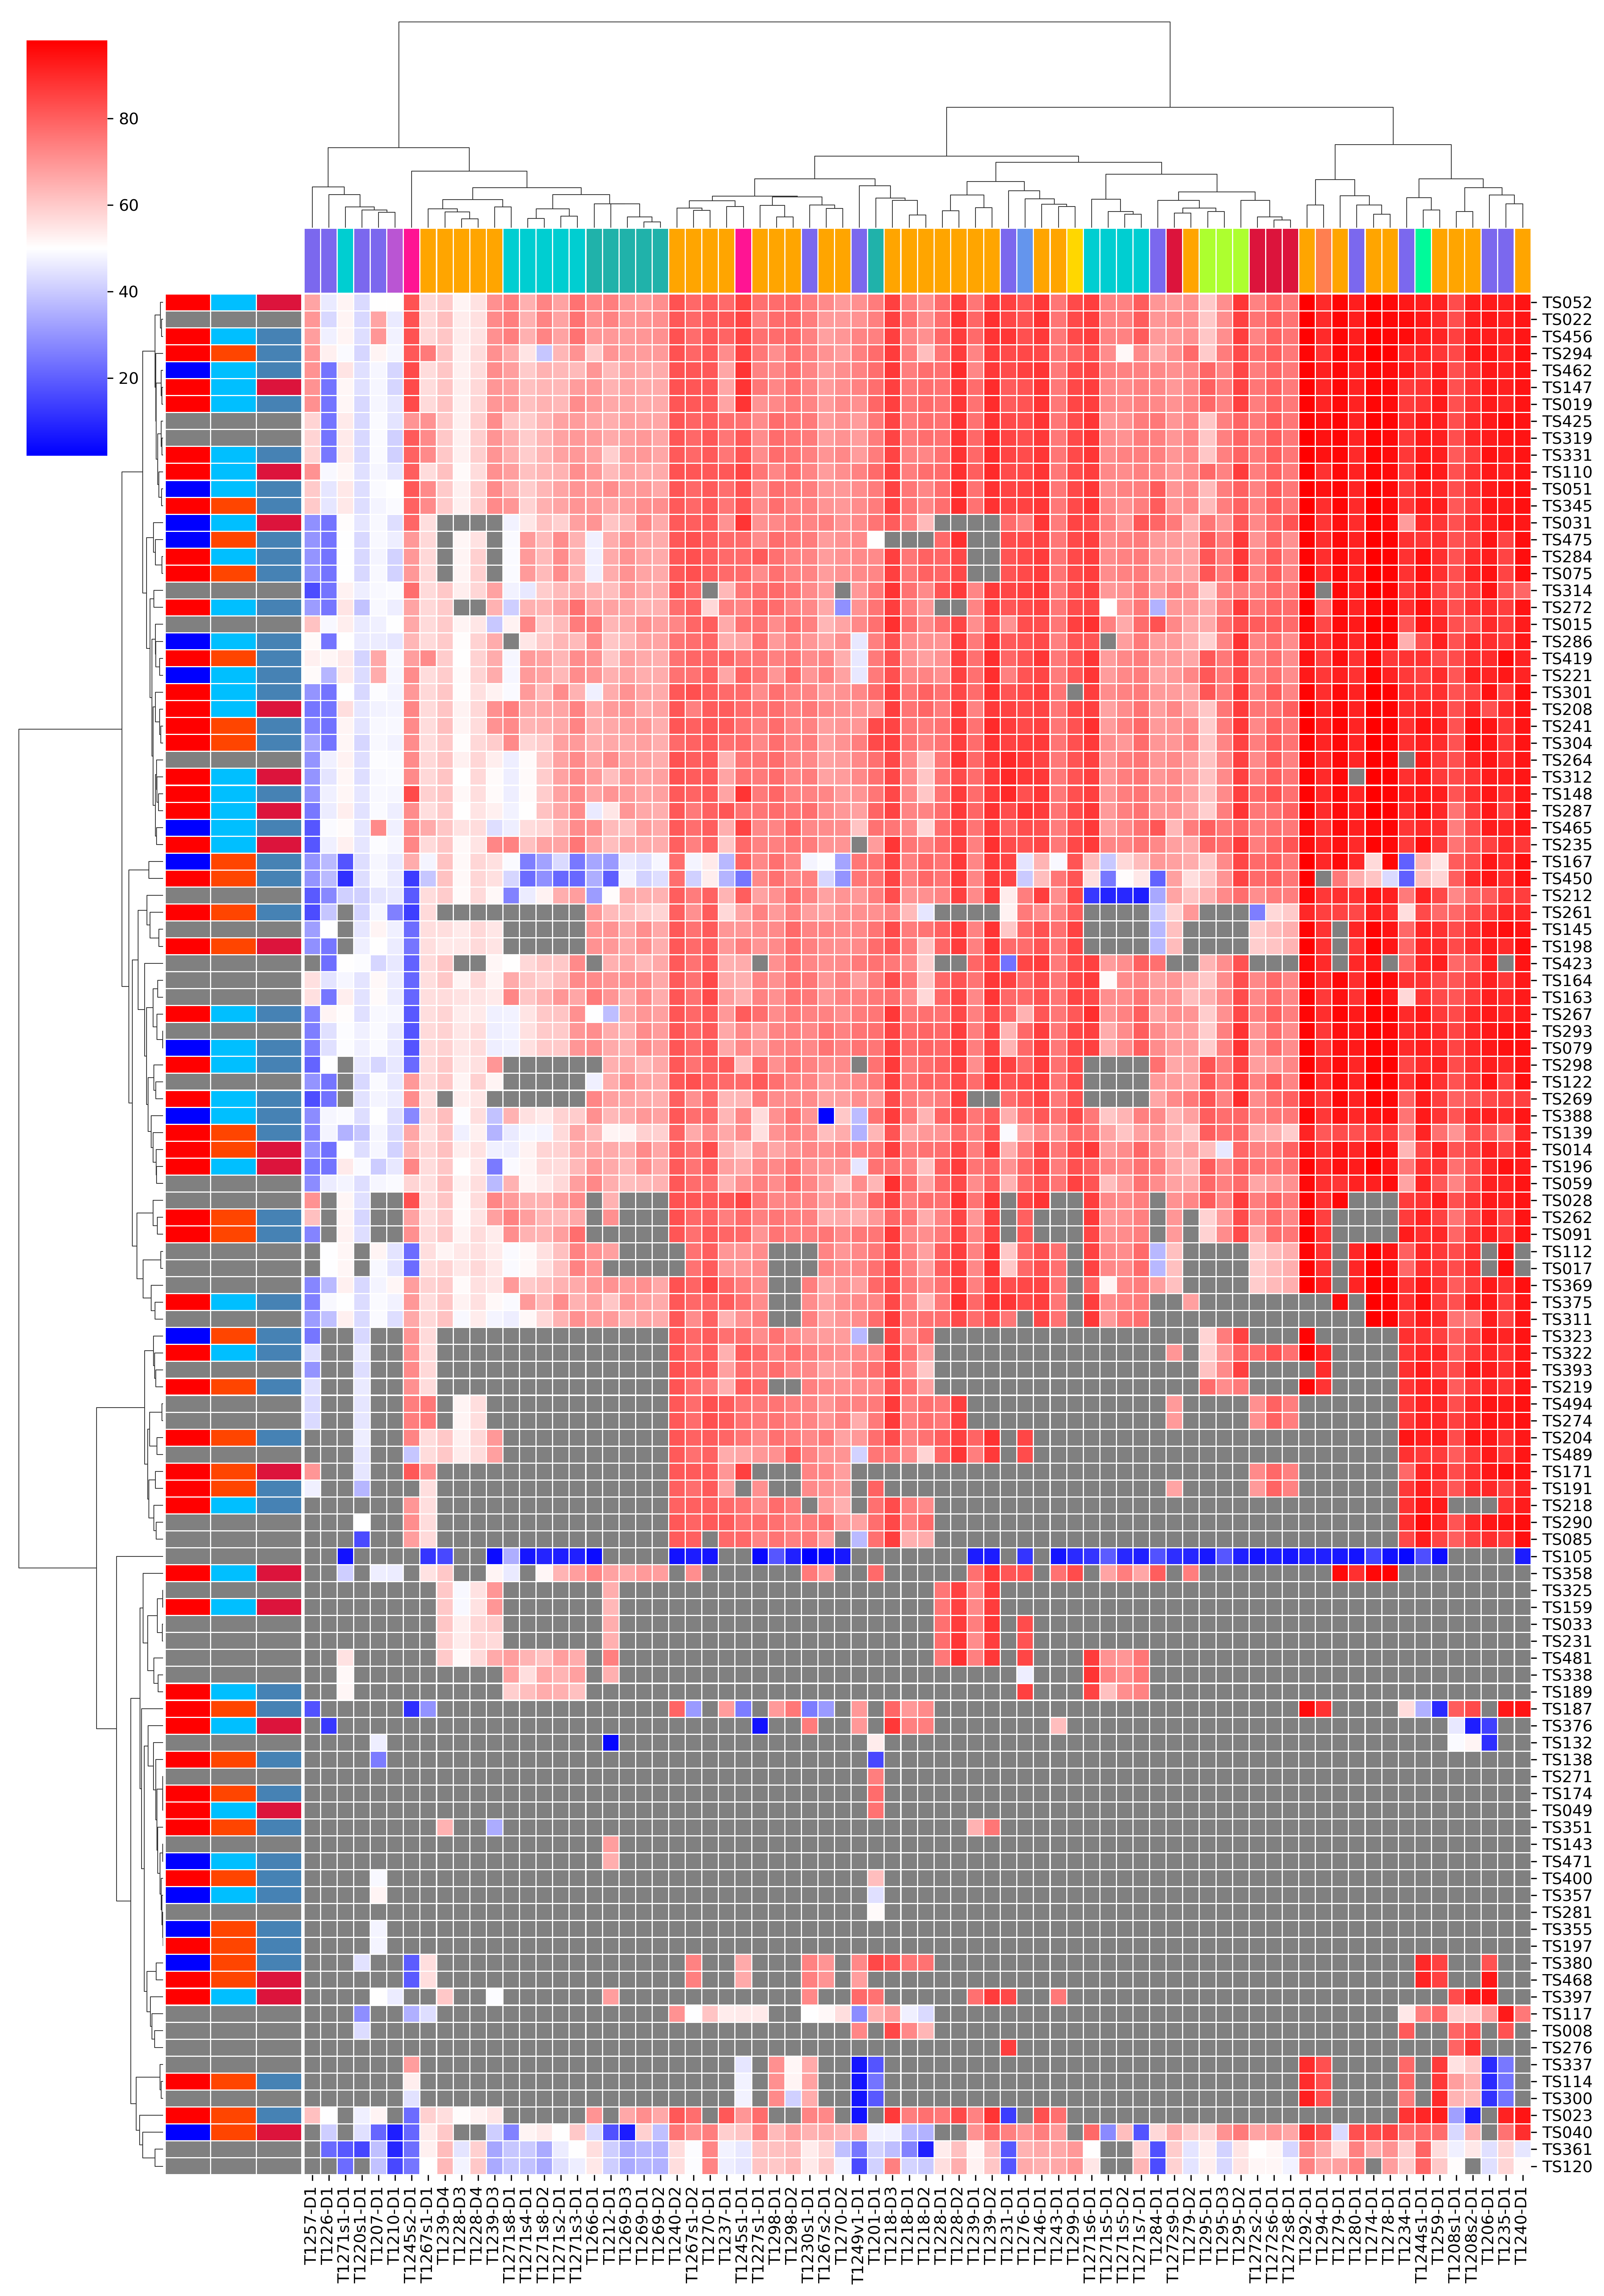

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# Step 1: Calculate row sums
sum = heatmap_data.sum(axis=1)

# Step 2: Sort indices based on row sums
sorted_indices = sum.sort_values(ascending=False).index

# Step 3: Sort the heatmap data and row sums, reset index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)

# Step 4: Sort mask based on sorted indices
sorted_mask = pd.DataFrame(mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)

# Step 5: Mask the sorted heatmap data
masked_data = sorted_heatmap_data.where(~sorted_mask)

# Step 6: Fill NaN values in masked_data with 50 for distance calculation
filled_data = masked_data.fillna(50)

# Step 7: Create custom colormap
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_bad(color='gray')  # Set the masked area to gray

# Step 8: Create a diverging norm to set midpoint at 50
norm = TwoSlopeNorm(vmin=filled_data.min().min(), vmax=filled_data.max().max(), vcenter=50)

row_colors=[row_colors_list_1, row_colors_list_2, row_colors_list_3]
col_colors=[column_colors_list_1]
# Step 9: Plot heatmap using clustermap
plt.figure(dpi=300)  # 设置 DPI（例如，150 DPI）
g=sns.clustermap(
    figsize=(14, 20),
    data=filled_data,
    dendrogram_ratio=(0.1, 0.1),  # Reduce the space taken by dendrograms
    cmap=cmap,                  # Use the custom blue-white-red colormap
    norm=norm,                  # Use diverging norm to center at 50
    linewidths=0.5,             # Set the linewidth between cells
    linecolor='white',          # Set the line color
    # cbar_kws={'shrink': 0.3,'aspect': 10, 'pad': 0.02, 'label': 'Intensity'},  # Add label to the color bar
    xticklabels=filled_data.columns,  # Use original column names as labels
    yticklabels=sorted_indices,       # Use sorted indices as row labels
    row_colors=row_colors,
    # row_cluster=False,
    col_colors=col_colors,
    mask=sorted_mask,            # Apply mask to the heatmap
    square=True, 
    method="ward",
)
g.fig.set_dpi(300)  # 再次设置为 150 DPI，如果需要更高分辨率，可以增加该值

# Show heatmap
plt.show()


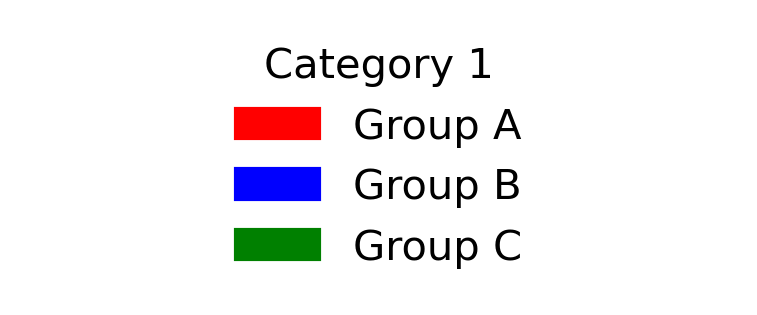

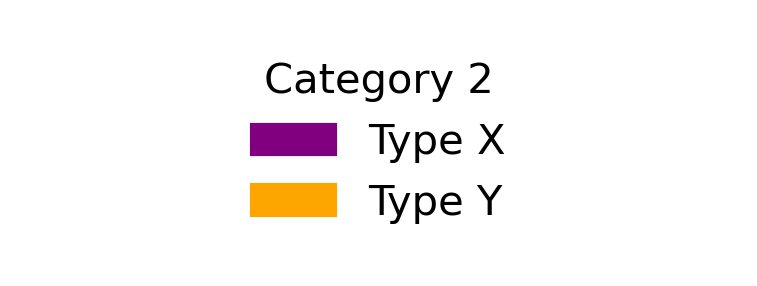

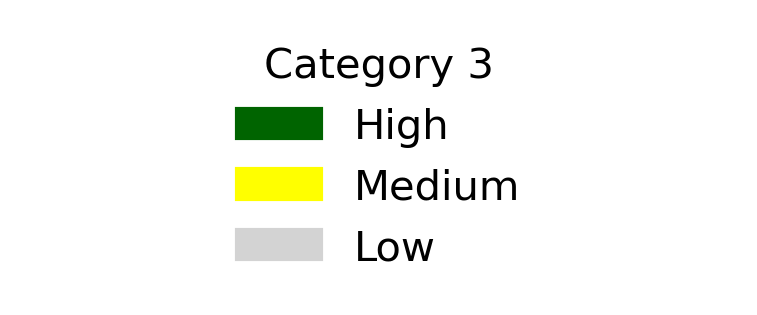

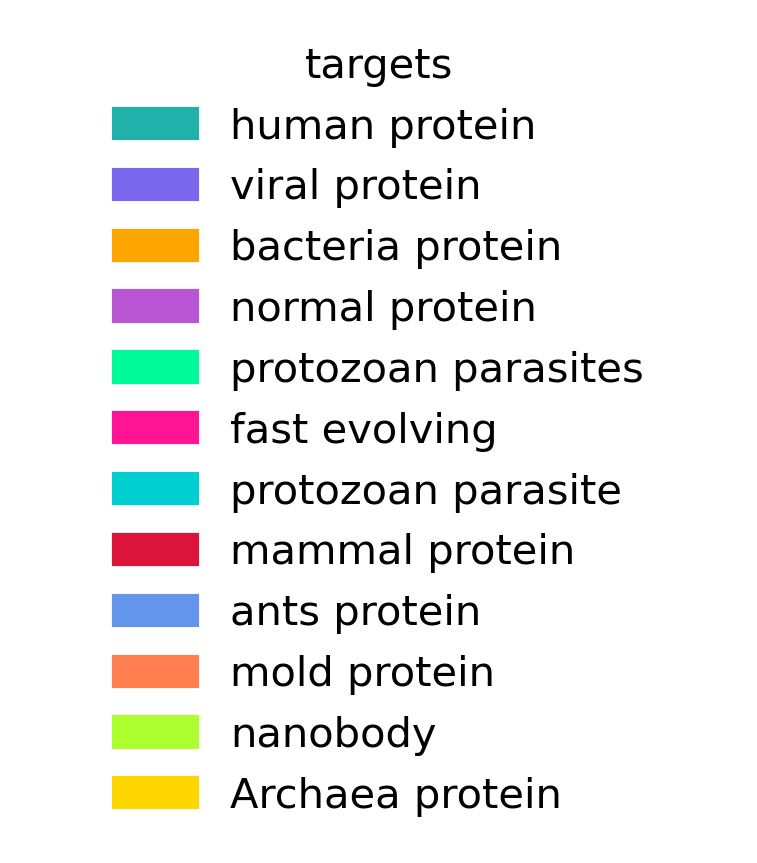

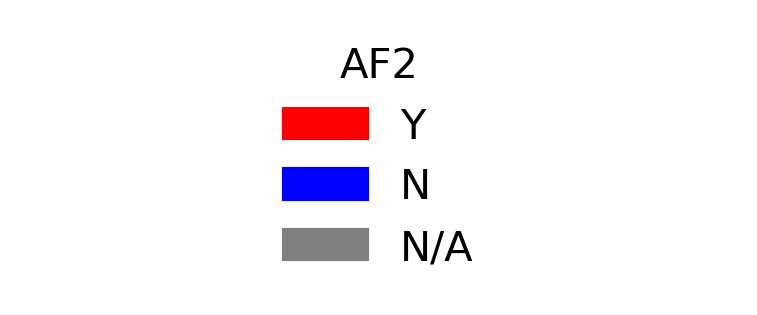

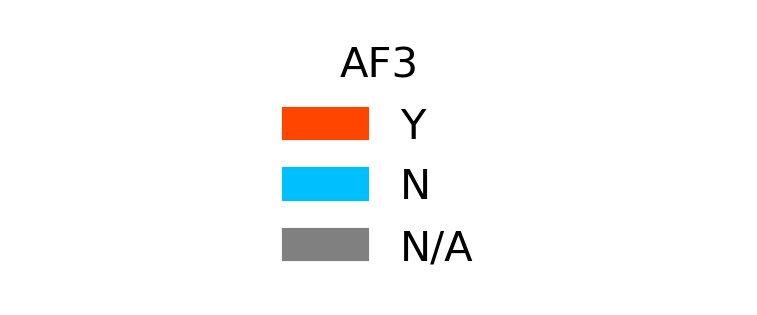

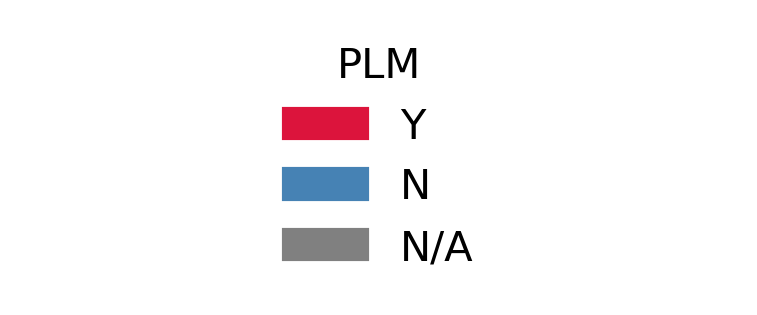

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 定义每个注解类别的颜色映射
colors_1 = {'Group A': 'red', 'Group B': 'blue', 'Group C': 'green'}
colors_2 = {'Type X': 'purple', 'Type Y': 'orange'}
colors_3 = {'High': 'darkgreen', 'Medium': 'yellow', 'Low': 'lightgrey'}

# 创建每个类别的图例图
def plot_legend(colors, title):
    fig, ax = plt.subplots(figsize=(3, 1), dpi=300)
    legend_elements = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
    ax.legend(handles=legend_elements, loc='center', title=title, frameon=False)
    ax.axis('off')  # 隐藏坐标轴
    plt.show()

# 绘制每个类别的图例
plot_legend(colors_1, "Category 1")
plot_legend(colors_2, "Category 2")
plot_legend(colors_3, "Category 3")
plot_legend(col_info_to_color, "targets")
plot_legend(AF2_color, "AF2")
plot_legend(AF3_color, "AF3")
plot_legend(PLM_color, "PLM")


In [12]:
measure = "GDT_TS"
measure = "GDT_HA"
# model = "first"
model = "best"
# mode = "easy"
# mode = "medium"
# mode = "hard"
mode = "all"
impute_value = -2

sys.path.append('/home2/s439906/project/CASP16/monomer/')
os.chdir('/home2/s439906/project/CASP16/monomer/')
heatmap_dir = "./heatmap/"
heatmap_file = f"heatmap_CASP16_{model}_{mode}_impute={impute_value}_equal_weight.csv"
heatmap_data = pd.read_csv(heatmap_dir + heatmap_file, index_col=0)
heatmap_data
raw_file = f"{measure}-{model}-{mode}-raw.csv"
score_path = "./score_T1/"
raw_data = pd.read_csv(score_path + raw_file, index_col=0)
mask = raw_data.isna()

In [13]:
sum = heatmap_data.sum(axis=1)
sorted_indices = sum.sort_values(ascending=True).index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(
    drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)
sorted_mask = pd.DataFrame(
    mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)
# use mask to mask the data. will be used for heatmap
masked_data = sorted_heatmap_data.copy()
masked_data[sorted_mask] = np.nan


# set up the colormap
cmap = plt.cm.YlGn
cmap = ListedColormap(cmap(np.linspace(0, 1, 256)))
cmap.set_bad(color='gray')  # set the masked area to gray
# set up the figure and gridspec
fig = plt.figure(figsize=(45, 30))
gs = GridSpec(1, 2, width_ratios=[4, 1], wspace=0.1)

# # 添加行注解的颜色条
# ax_column_colors = fig.add_subplot(gs[0])
# row_colors = column_annotations.map({'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green'})
# for idx, color in enumerate(row_colors):
#     ax_column_colors.add_patch(plt.Rectangle((0, idx), 1, 1, color=color))
# ax_column_colors.set_xlim(0, 1)
# ax_column_colors.set_ylim(len(row_colors), 0)
# ax_column_colors.axis("off")  # 隐藏坐标轴


# plot the heatmap
ax0 = fig.add_subplot(gs[0])
sns.heatmap(masked_data, cmap=cmap, cbar=True, ax=ax0)
ax0.set_yticklabels(
    [f'{i}' for i in sorted_indices], rotation=0)  # use the same order as the row sum
ax0.set_xticklabels(sorted_heatmap_data.columns, rotation=45, ha='right')
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
cbar = ax0.collections[0].colorbar
cbar.ax.tick_params(labelsize=24)
ax0.set_title(
    "Heatmap for z-scores for monomers", fontsize=32)
# plot the row sum
ax1 = fig.add_subplot(gs[1], sharey=ax0)
y_pos = range(len(sorted_sum))
y_pos = [i+0.5 for i in y_pos]  # change the position of the bars
ax1.barh(y_pos, sorted_sum, color='tan')
ax1.set_yticks(range(len(sorted_sum)))
ax1.set_yticklabels(
    [f'{i}' for i in sorted_indices], rotation=0)  # use the same order as the heatmap
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.invert_yaxis()  # flip the y-axis
ax1.set_xlabel("Sum", fontsize=16)
ax1.set_title("Group sum z-scores", fontsize=20)
# save the figure
plt.tight_layout()
plt.show()

TypeError: Must pass DataFrame or 2-d ndarray with boolean values only

In [ ]:
sum = heatmap_data.sum(axis=1)
sorted_indices = sum.sort_values(ascending=False).index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(
    drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)
sorted_mask = pd.DataFrame(
    mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)
# use mask to mask the data. will be used for heatmap
masked_data = sorted_heatmap_data.copy()
masked_data[sorted_mask] = np.nan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# Step 1: Calculate row sums
sum = heatmap_data.sum(axis=1)

# Step 2: Sort indices based on row sums
sorted_indices = sum.sort_values(ascending=False).index

# Step 3: Sort the heatmap data and row sums, reset index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)

# Step 4: Sort mask based on sorted indices
sorted_mask = pd.DataFrame(mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)

# Step 5: Mask the sorted heatmap data
masked_data = sorted_heatmap_data.where(~sorted_mask)

# Step 6: Create custom colormap
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_bad(color='gray')  # Set the masked area to gray

# Step 7: Create a diverging norm to set midpoint at 0
norm = TwoSlopeNorm(vmin=masked_data.min().min(), vmax=masked_data.max().max(), vcenter=0)

# Step 8: Plot heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(
    masked_data,
    annot=False,                # If you want to display the values, set to True
    cmap=cmap,                  # Use the custom blue-white-red colormap
    norm=norm,                  # Use diverging norm to center at 0
    linewidths=0.2,             # Set the linewidth between cells
    linecolor='white',          # Set the line color
    cbar_kws={'label': 'Intensity'},  # Add label to the color bar
    xticklabels=masked_data.columns,  # Use original column names as labels
    yticklabels=sorted_indices,       # Use sorted indices as row labels
    square=True,                # Make each cell square
    mask=sorted_mask            # Apply mask to the heatmap
)

# Set title and labels
plt.title('Heatmap')
plt.xlabel('Groups')
plt.ylabel('Evaluation Units')

# Show heatmap
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.gridspec import GridSpec

# Step 1: Calculate row sums
sum = heatmap_data.sum(axis=1)

# Step 2: Sort indices based on row sums
sorted_indices = sum.sort_values(ascending=False).index

# Step 3: Sort the heatmap data and row sums, reset index
sorted_heatmap_data = heatmap_data.loc[sorted_indices].reset_index(drop=True)
sorted_sum = sum.loc[sorted_indices].reset_index(drop=True)

# Step 4: Sort mask based on sorted indices
sorted_mask = pd.DataFrame(mask, index=heatmap_data.index).loc[sorted_indices].reset_index(drop=True)

# Step 5: Mask the sorted heatmap data
masked_data = sorted_heatmap_data.where(~sorted_mask)

# Step 6: Fill NaN values in masked_data with 50 for distance calculation
filled_data = masked_data.fillna(50)

# Step 7: Create custom colormap
colors = ["blue", "white", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_bad(color='gray')  # Set the masked area to gray

# Step 8: Create a diverging norm to set midpoint at 50
norm = TwoSlopeNorm(vmin=filled_data.min().min(), vmax=filled_data.max().max(), vcenter=50)

col_colors = [column_colors_list_1]

# Step 9: Create figure with custom GridSpec
fig = plt.figure(figsize=(18, 25))
gs = GridSpec(2, 2, width_ratios=[0.05, 0.95], height_ratios=[0.05, 0.95], wspace=0.1, hspace=0.1)

# Step 10: Plot heatmap without color bar
ax = fig.add_subplot(gs[1, 1])
sns.heatmap(
    filled_data,
    ax=ax,
    cmap=cmap,                  # Use the custom blue-white-red colormap
    norm=norm,                  # Use diverging norm to center at 50
    linewidths=0.01,            # Set the linewidth between cells
    linecolor='white',          # Set the line color
    xticklabels=filled_data.columns,  # Use original column names as labels
    yticklabels=sorted_indices,       # Use sorted indices as row labels
    mask=sorted_mask,            # Apply mask to the heatmap
    square=True,
    cbar=False,                 # Disable color bar in the heatmap
)

# Step 11: Add color bar separately
cax = fig.add_subplot(gs[1, 0])
cbar = plt.colorbar(ax.collections[0], cax=cax, orientation='vertical')
cbar.set_label('Intensity')
cbar.ax.tick_params(labelsize=10)

# Show heatmap
plt.show()
